<font size="6"><strong><center>Datathon FY'25<center></strong></font>

<font size="5"><font color = "blue"><strong><center><i>Team 3 - Accenture Super Kings</i><center></strong></font>

<font size="4"><font color = "red"><strong><center>IMPACT ANALYSIS OF DIABETES ON HUMANS<center></strong></font>

<b>Python Imports</b>

In [1]:
# Dataset Preprocessing
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns

# Encoding
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline

# Data Scaling
from sklearn.preprocessing import StandardScaler

# KNN Imputation
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

## Exploring the Dataset

In [2]:
# Importing Dataset
raw_dataset = pd.read_csv('../data/raw_data/diabetes_data.csv')
diabetes_ds = raw_dataset

In [3]:
diabetes_ds

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,male,24.0,NaN,0.29,vegetarian,Libra,18.9,56.0,0.0,Never,Sedentary,2.6,Elevated,0.0,light,1.0
99996,male,53.0,1.0,0.64,weight watchers,NaN,28.4,140.8,NaN,Excessive,Lightly Active,7.5,Moderate,0.0,NaN,1.0
99997,male,61.0,0.0,0.34,NaN,Taurus,NaN,NaN,NaN,Excessive,Lightly Active,2.8,Moderate,0.0,heavy,1.0
99998,male,NaN,0.0,0.71,mediterranean,Leo,28.8,123.6,0.0,Excessive,Sedentary,0.4,Moderate,0.0,none,1.0


diabetes_ds.info()

The dataset contains <b>100,000 rows and 16 columns</b>, including a target variable.

Approximately <b>20% of the records contain missing values (NAs)</b>, which must be addressed using appropriate imputation techniques. Additionally, some columns may require encoding to handle categorical data effectively.

The dataset consists of a mix of <b>float64 and object data types</b>. The object-type columns should be appropriately transformed into categorical variables using encoding methods to ensure compatibility with the desired analysis or modeling pipeline.

Let us now look at the descriptive statistics of the dataset:

In [4]:
diabetes_ds.describe()

,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes
count,80145.000000,80169.000000,80120.000000,79934.000000,80126.000000,79863.000000,80063.000000,80033.000000,80242.000000
mean,45.107306,0.202248,0.500877,26.978545,150.526618,0.302167,5.295149,0.758212,0.954936
std,18.550434,0.401678,0.173783,6.005039,57.731539,0.459200,2.842133,1.281326,0.207445
min,18.000000,0.000000,0.200000,1.800000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.350000,22.900000,100.300000,0.000000,3.300000,0.000000,1.000000
50%,45.000000,0.000000,0.500000,27.000000,150.900000,0.000000,5.300000,0.000000,1.000000
75%,60.000000,0.000000,0.650000,31.000000,200.400000,1.000000,7.000000,1.000000,1.000000
max,91.000000,1.000000,0.800000,53.100000,250.000000,1.000000,12.000000,5.000000,1.000000


We can see that the scale of each feature column is different and varied.

<b>FEATURE DESCRIPTION:</b>

The description of each feature in the dataset is given below:

**Types of Features:**

- **Categorical features** (Has two or more categories, and each value in that feature can be categorized by them)
  - **Ordinal features** (Variable having relative ordering or sorting between the values)  
    - Examples: `hypertension`, `family_diabetes_history`, `pregnancies`, `social_media_usage`, `physical_activity_level`, `stress_level`, `alcohol_consumption`, `diabetes`
  - **Nominal features** (Variable with no inherent ordering or ranking among the values)  
    - Examples: `gender`, `diet_type`, `star_sign`

- **Continuous features** (Variable taking values between any two points or between the minimum or maximum values in the feature column)  
  - Examples: `age`, `weight`, `diabetes_pedigree_function`, `sleep_duration`, `BMI`

Let's now look at the pictorial representation of the distribution of categorical feature columns:

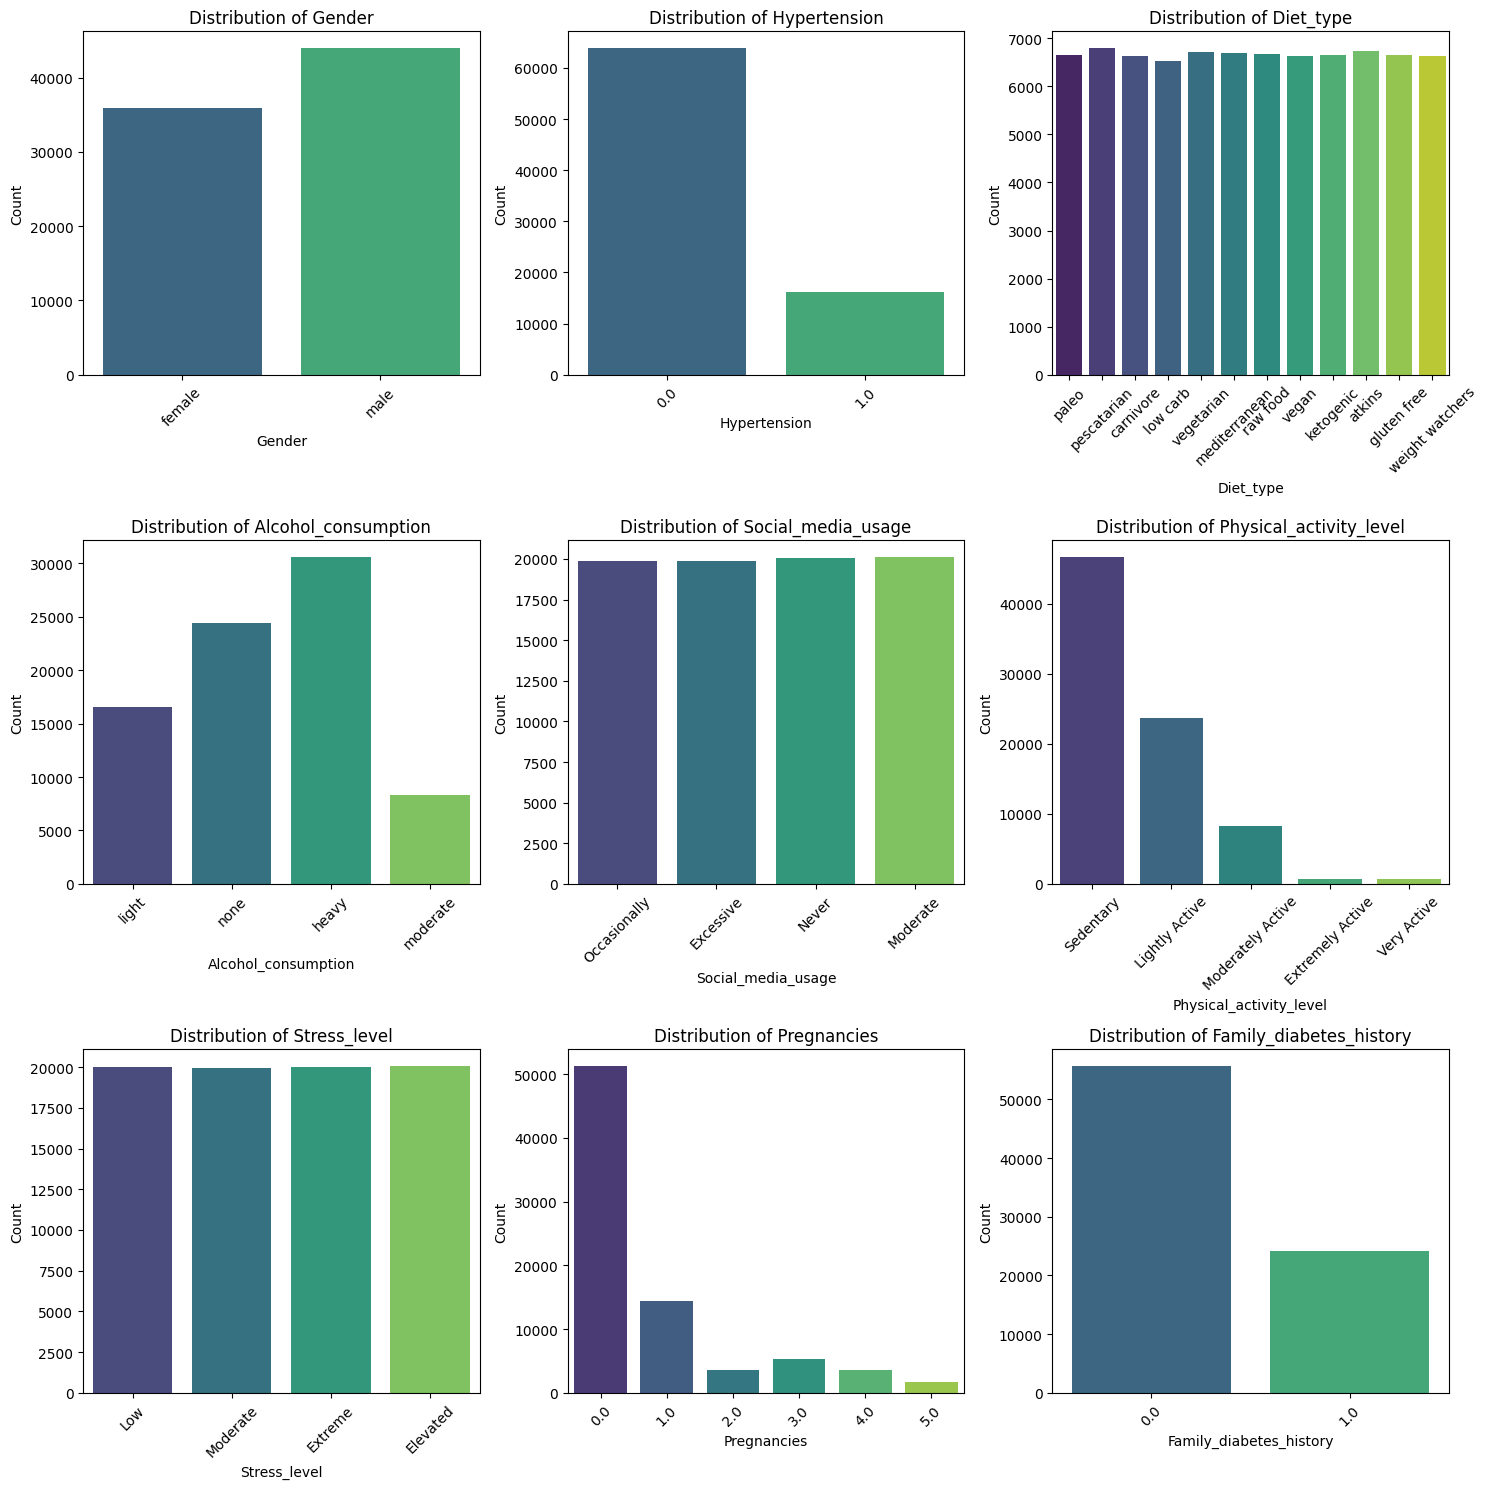

In [5]:
# List of 9 categorical features to plot
# We are ignoring the target column and star_sign in this representation
categorical_columns = [
    'gender', 'hypertension', 'diet_type', 'alcohol_consumption', 
    'social_media_usage', 'physical_activity_level', 'stress_level', 
    'pregnancies', 'family_diabetes_history'
]

# Sets up a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Generates a bar chart for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(data=diabetes_ds, x=column, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {column.capitalize()}", fontsize=12)
    axes[i].set_xlabel(column.capitalize(), fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar charts indicate that categorical features such `as diet_type`, `social_media_usage`, and `stress_level` exhibit a relatively balanced distribution across their respective categories, with no single category dominating significantly.

In contrast, features such as `hypertension, alcohol_consumption, physical_activity_level, pregnancies, and family_diabetes_history` demonstrate a skewed distribution, where one particular category constitutes a significantly larger proportion of the dataset compared to others. This suggests potential class imbalance in these features.

Let's now look at the pictorial representation of the distribution of continuous or numerical feature columns:

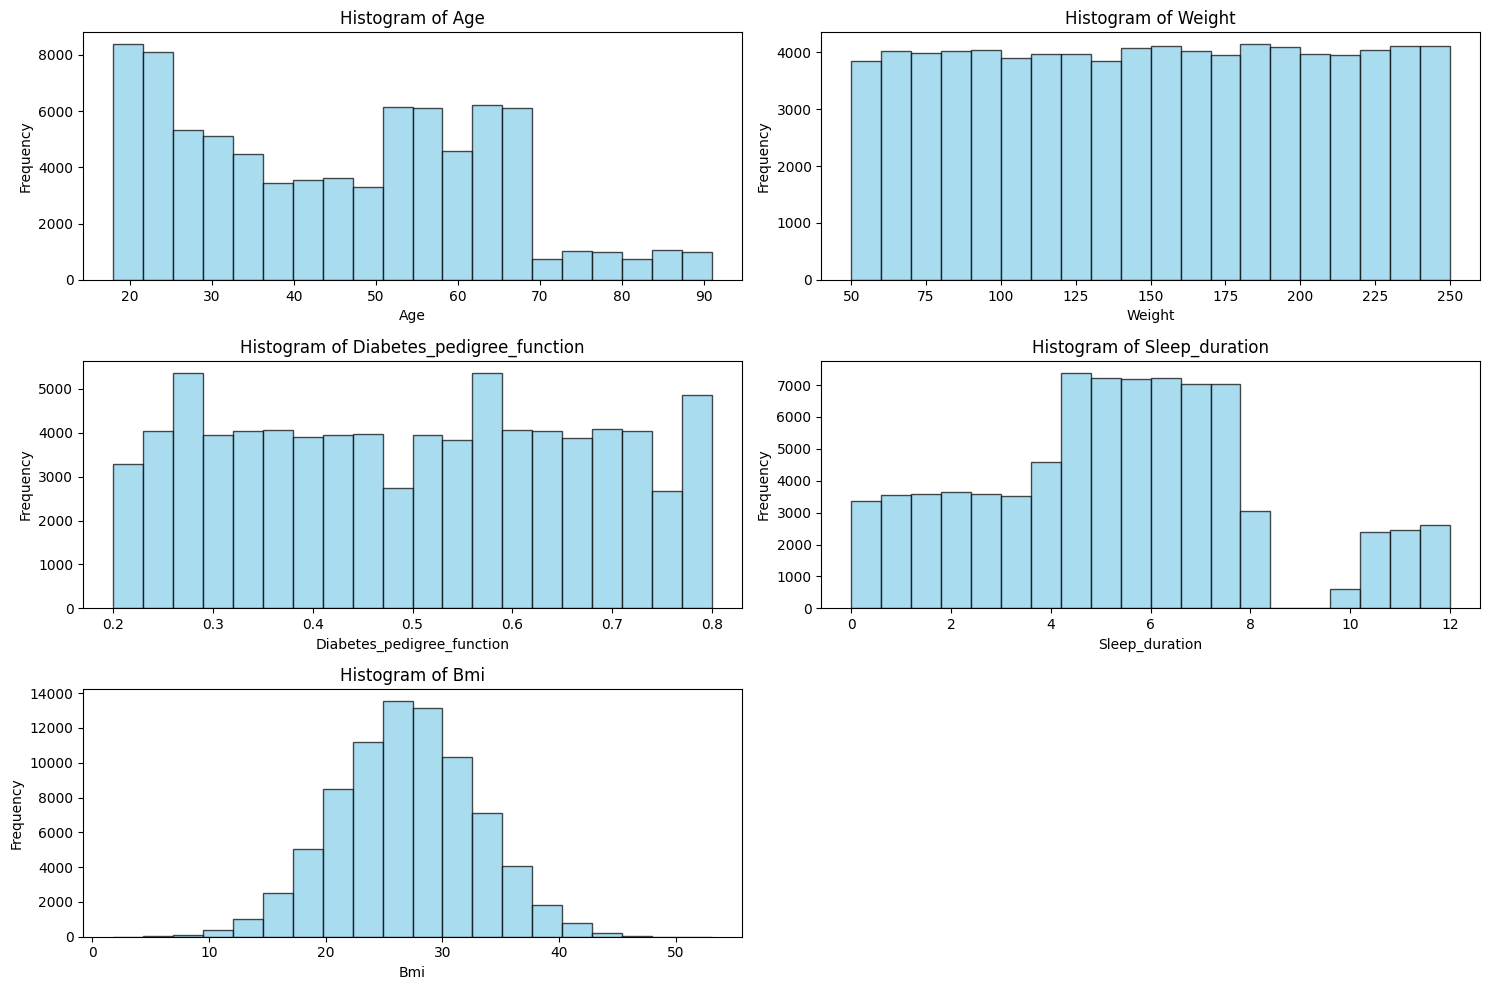

In [6]:
# List of 5 continuous features to plot
continuous_columns = ['age', 'weight', 'diabetes_pedigree_function', 'sleep_duration', 'BMI']

# Sets up a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

# Plots histograms for each continuous feature
for i, column in enumerate(continuous_columns):
    axes[i].hist(diabetes_ds[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of {column.capitalize()}", fontsize=12)
    axes[i].set_xlabel(column.capitalize(), fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Hides unused subplots
for j in range(len(continuous_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

From the above histograms plots, we can infer that the feature column `age` is right-skewed, columns `weight`, `diabetes_pedigree_function` and `sleep_duration` are uniformly distributed with `sleep_duration` looks having few outliers.

The `BMI` feature column is normally distributed.

## Data Cleaning & PreProcessing

### Handling NAs & Unwanted features

In this step, we will remove all rows where the target variable `diabetes` contains null or NaN values, as these entries cannot contribute to our analysis.<br>
Dropping rows with missing values in the target variable is more appropriate than imputing them, as imputations may introduce bias or inaccuracies in the target prediction.

Furthermore, the `star_sign` feature is deemed <b>irrelevant to the analysis</b> and does not provide any meaningful contribution to the model. Therefore, this feature will be <b>dropped</b> and excluded from further analysis.

In [7]:
diabetes_ds = diabetes_ds.dropna(subset=['diabetes'])

diabetes_ds = diabetes_ds.drop('star_sign', axis=1)

Now the dataset is reduced to 80242 rows and 15 columns with no NaN values in the target column.

In [8]:
### Handling Outliers

Previously, we observed potential outliers in the dataset based on the **histogram plots**. To validate this observation, we will utilize **box plots** and compute the **Interquartile Range (IQR)** for each individual categorical feature in the dataset.<br> This approach will help us accurately identify and confirm the presence of outliers.

In [9]:
# Function to determine the outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outlier_mask = (df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))
    outliers = df[outlier_mask]
    return outliers

for column in continuous_columns:
    outliers = find_outliers_IQR(diabetes_ds['age'])
    print('Number of outliers in ' + column +' :'+ str(len(outliers)))
    print('Max outlier value: '+ str(outliers.max()))
    print('Min outlier value: '+ str(outliers.min()))

Number of outliers in age :0
Max outlier value: nan
Min outlier value: nan
Number of outliers in weight :0
Max outlier value: nan
Min outlier value: nan
Number of outliers in diabetes_pedigree_function :0
Max outlier value: nan
Min outlier value: nan
Number of outliers in sleep_duration :0
Max outlier value: nan
Min outlier value: nan
Number of outliers in BMI :0
Max outlier value: nan
Min outlier value: nan


Based on the analysis, we can conclude that the dataset does not contain any significant outliers that require removal.

In [10]:
### Handling NAs in feature columns

As previously discussed during the exploration of the diabetes dataset, approximately **20% of the data contains missing values (NaN)**.  
To address these missing values, the most suitable approach involves **encoding techniques** for categorical features and **K-Nearest Neighbors (KNN) imputation** for continuous features, given the moderate proportion of missing data.

For simplicity, and since most of the categorical features in the dataset are **ordinal**, we will utilize **Label Encoding** to handle missing values in the corresponding columns. This approach ensures consistency and appropriateness in imputing missing values for these feature types.

In [11]:
# Columns to label encode
columns_to_label_encode = ["hypertension", "family_diabetes_history", "social_media_usage","physical_activity_level","stress_level", "alcohol_consumption", "pregnancies", "diabetes", "gender", "diet_type"]

# Apply LabelEncoder to each column
label_encoders = {}
for col in columns_to_label_encode:
    label_encoders[col] = LabelEncoder()
    diabetes_ds[col] = label_encoders[col].fit_transform(diabetes_ds[col])

In [12]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80242 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      80242 non-null  int64  
 1   age                         64265 non-null  float64
 2   hypertension                80242 non-null  int64  
 3   diabetes_pedigree_function  64270 non-null  float64
 4   diet_type                   80242 non-null  int64  
 5   BMI                         64080 non-null  float64
 6   weight                      64313 non-null  float64
 7   family_diabetes_history     80242 non-null  int64  
 8   social_media_usage          80242 non-null  int64  
 9   physical_activity_level     80242 non-null  int64  
 10  sleep_duration              64259 non-null  float64
 11  stress_level                80242 non-null  int64  
 12  pregnancies                 80242 non-null  int64  
 13  alcohol_consumption         80242 no

We can observe that there are no null values now in any categorical features, as they are imputed with a separate encoded value by the algorithm.

Now, let's proceed with addressing the missing values in continuous features.<br> Since we have a moderately sized dataset, it has been decided that the best approach is to use the KNN Imputation method to fill the missing values in the continuous features.

However, before handling the missing values, it is crucial to standardize the data because KNN relies on distance metrics (e.g., Euclidean distance) to identify neighbors.<br> Without standardization, features with larger scales may dominate the distance calculation, leading to biased neighbor selection and inaccurate imputations.<br> Standardizing scales all features to a similar range (mean = 0, standard deviation = 1), ensuring fair contributions from all features and improving imputation accuracy.

<b>Scaling Data</b>

Feature scaling is an important step in pre-processing for Machine Learning. Most ML and optimization algorithms perform better when features are on the same scale.

For this dataset, we will scale the data using **Standardization**, as **Normalization** should be implemented on a case-by-case basis depending on the ML algorithms to be used for model building.

In [13]:
# Standardizing Data
standardScaler = StandardScaler()

diabetes_ds[continuous_columns] = standardScaler.fit_transform(diabetes_ds[continuous_columns])

After Standardization of the dataset, the selected features are transformed to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

This scaling happened independently on each individual selected feature by computing the relevant statistics of the samples in the dataset.

In [14]:
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=10)

# Apply the imputer to the selected columns
imputed_columns = knn_imputer.fit_transform(diabetes_ds[continuous_columns])

# Replace the original columns with the imputed values
diabetes_ds[continuous_columns] = imputed_columns

The choice of <b>n_neighbors=10</b> for KNN Imputer in our scenario is based on a balance of theoretical reasoning, practical experience, and the dataset characteristics such as dataset size (~80000 rows) and missing value proprotion (20%).

In [15]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80242 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      80242 non-null  int64  
 1   age                         80242 non-null  float64
 2   hypertension                80242 non-null  int64  
 3   diabetes_pedigree_function  80242 non-null  float64
 4   diet_type                   80242 non-null  int64  
 5   BMI                         80242 non-null  float64
 6   weight                      80242 non-null  float64
 7   family_diabetes_history     80242 non-null  int64  
 8   social_media_usage          80242 non-null  int64  
 9   physical_activity_level     80242 non-null  int64  
 10  sleep_duration              80242 non-null  float64
 11  stress_level                80242 non-null  int64  
 12  pregnancies                 80242 non-null  int64  
 13  alcohol_consumption         80242 no

<b>All features in the dataset now have complete values, with no NaNs or missing entries. The dataset is fully prepared for further analysis.</b>

#### Correlation Heatmap

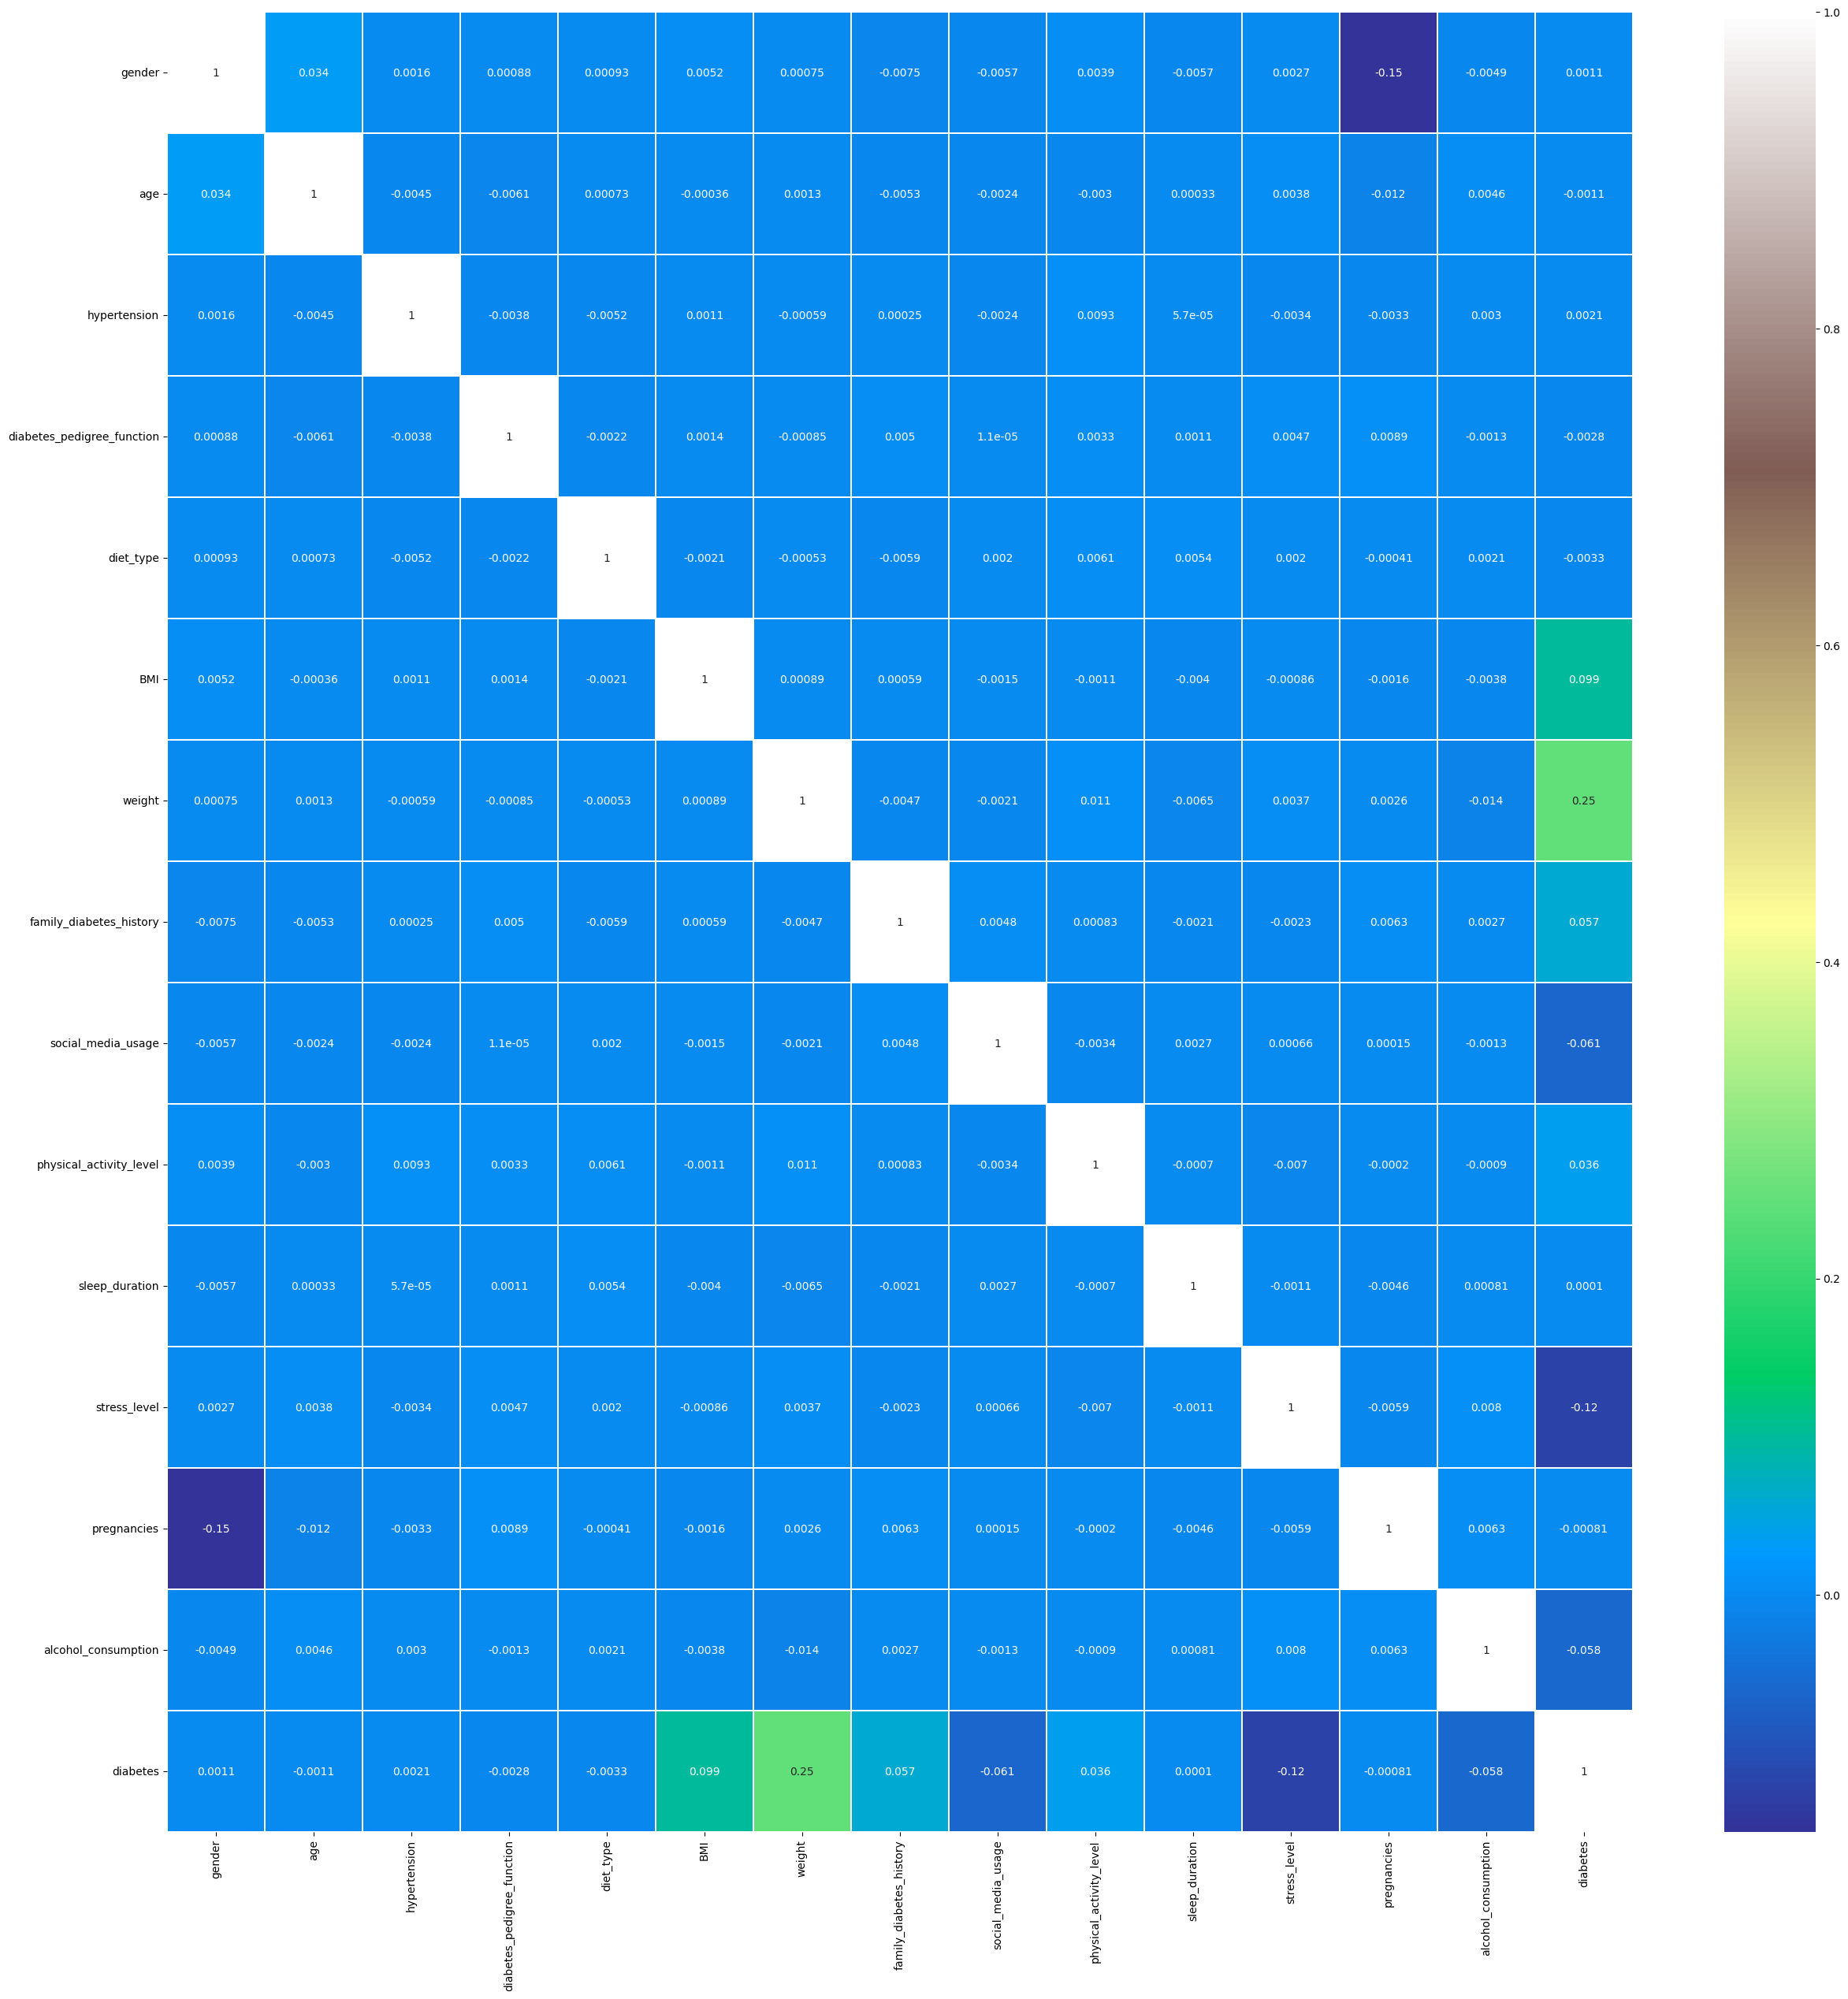

In [16]:
# creating a correlation heatmap
sns.heatmap(diabetes_ds.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

The above correlation heatmap shows the relationship between various features and the target variable `diabetes` using correlation coefficients.

### Key Observations:

- **Weight** has the highest positive correlation (**0.25**), suggesting it is an important predictor of diabetes.
- **BMI (Body Mass Index)** and **stress_level** show comparitively strong correlations (**0.099** and **0.12**, respectively).
- Features such as **social_media_usage**, **family_diabetes_history**, **alcohol_consumption** and **physical_activity** show moderate and weak correlations.
- Features like **gender**, **age**, **hypertension**, **diabetes_pedigree_function**, **diet_type**, **sleep_duration** and **pregnancies** have negligible correlations (values near 0), meaning they have limited or no direct linear impact on diabetes in this dataset.

<font color="red"><b>Based on the analysis, we can conclude that the following seven factors have a significant impact on the likelihood of developing diabetes in humans.</b>

- **weight**
- **BMI**
- **stress_level**
- **social_media_usage**
- **family_diabetes_history**
- **alcohol_consumption**
- **physical_activity**

#### Dumping the cleaned dataset to a CSV file

In [18]:
file_path = "../data/cleaned_data/diabetes_ds_cleaned.csv"

diabetes_ds.to_csv(file_path, index=False)

A well-prepped dataset is stored as a CSV file and upload to the GitHub.